# A Practical Machine Learning Guide and Improving the Performance of a Machine Learning Model

Churn prediction is a common use case in the machine learning domain. If you are not familiar with the term, churn means “leaving the company”. It is very critical for a business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take action to prevent customers from leaving the company.

In this post, we aim to build a supervised learning algorithm to perform a classification task. The goal is to predict whether a customer will churn (i.e. exited = 1) using the provided features

The first step is to import the necessaries libraries

In [1]:
# Load the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling as pf
pd.set_option('display.max_column', 60)
import matplotlib.pyplot as plt
%matplotlib inline

# impoerting models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
print('complete')

complete


Next we read the dataset into a pandas dataframe.

In [2]:
# read the dataset
data = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\1\Dataset\Churn_Prediction_of_bank_customers.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# lets check the dimension of the data
nrows, ncols = data.shape
print(f'The number of observations are {nrows}, while we have {ncols} as number of features')

The number of observations are 10000, while we have 14 as number of features


In [4]:
# checking the information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# checking the missing values
data.isnull().values.any()

False

It is obvious that our dataset has no null values and our columns are in the right data type

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploring the Data

In [5]:
# view the columns name
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are a few redundant features. “RowNumber” column is just an index. “CustomerId” and “Surname” columns are obviously useless for a machine learning model. The last name or ID of a customer will not tell us anything about customer churn. Thus, we should drop them not to put unnecessary computation burden on the model.

In [14]:
# dropping useless columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [15]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Geography and gender features may have an effect on customer churn. One way is to use the groupby function of pandas.

In [8]:
data[['Gender', 'Geography', 'Exited']].groupby(['Gender', 'Geography']).agg(['mean', 'count'])

Exited      
                      mean count
Gender Geography                
Female France     0.203450  2261
       Germany    0.375524  1193
       Spain      0.212121  1089
Male   France     0.127134  2753
       Germany    0.278116  1316
       Spain      0.131124  1388

__Finding:__ Females are likely to churn than males in all three countries.

__Finding:__ The churn rate in Germany is higher than the churn rate in the other two countries. France has the most customers.

Let’s see how the age of a customer is related to the churn rate.

<Figure size 720x504 with 0 Axes>

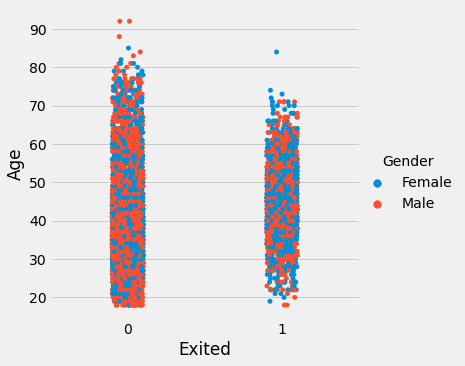

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,7))
sns.catplot(x = 'Exited', y= 'Age', hue = 'Gender', data = data)

__Finding:__ Age does not cause a very significant difference in terms of customer churn. However, there are more older people on the not-churn (exited=0) side. Let's check the credit score of the customers.

Can the credit score of the customer determine their churn ?
Let's start with the meaning of credit score
__Credit Score:__ Means a number that represents a person’s creditworthiness. Credit scores are based on a variety of personal financial data. Higher credit scores correlate with better creditworthiness. Financial institutions judge people with higher credit scores to have lower credit risk, and grant them a broader selection of credit products at lower interest rates.

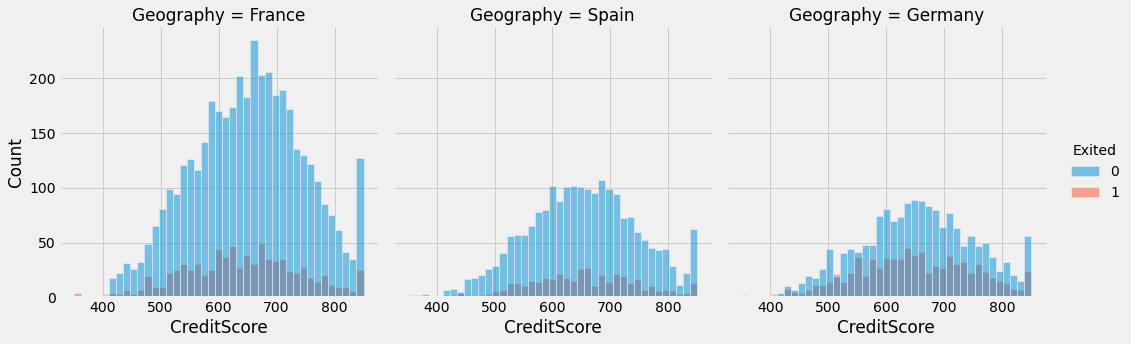

In [11]:
sns.displot(data = data, x = 'CreditScore', col = 'Geography', hue = 'Exited', kind = 'hist')

__Tenure,__ how long a customer has been a customer, might also be an indicating factor about customer churn. let's look at it.

In [12]:
data[['Tenure', 'Exited']].groupby('Tenure').agg(['mean', 'count']).sort_values(by = [('Exited', 'mean')])

Exited      
            mean count
Tenure                
7       0.172179  1028
2       0.191794  1048
8       0.192195  1025
6       0.202689   967
4       0.205258   989
10      0.206122   490
5       0.206522  1012
3       0.211100  1009
9       0.216463   984
1       0.224155  1035
0       0.230024   413

There is not an easily recognizable pattern between tenure and churn.

Let's check the distribution of the age column.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

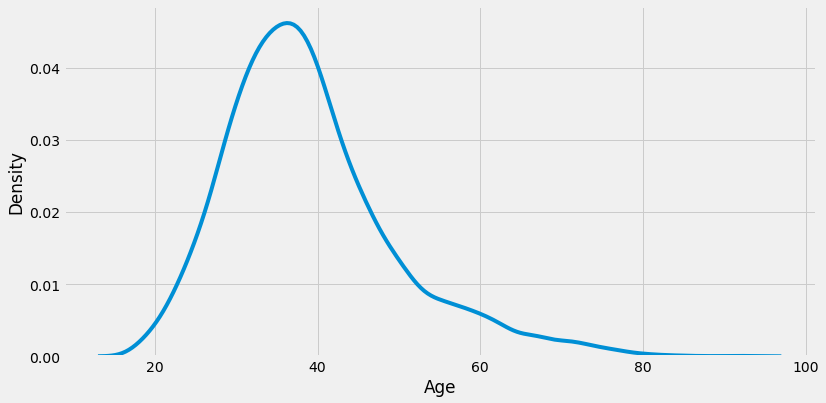

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
sns.distplot(a = data.Age, hist=False)

The Age distribution is right-skewed which indicates outliers on the right side. This is important when normalizing the features. We will get to that point

__Correlation__
The correlation matrix gives us an overview of the relationships between variables by providing pair-wise correlation values. It only takes numerical values. Thus, it is better to convert categories in “Geography” and “Gender” columns to numerical ones.

The corr function of pandas creates a correlation matrix which then can be visualized with a heatmap.

<AxesSubplot:>

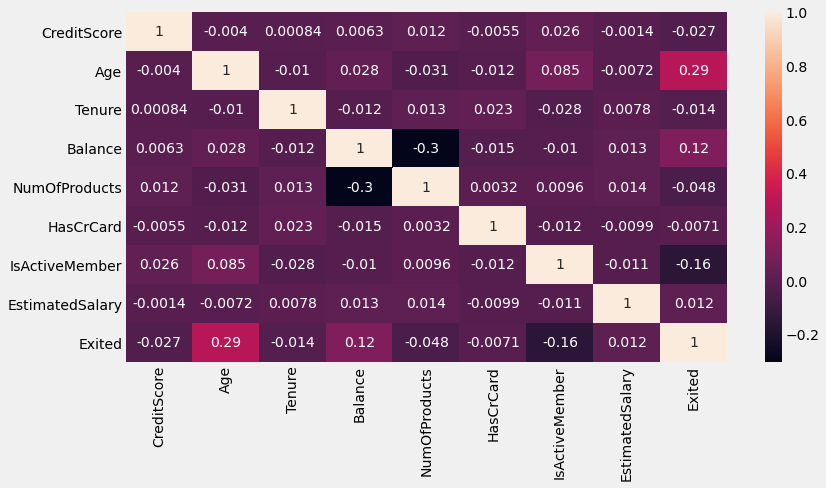

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), annot = True)

In [7]:
corr = data.corr()['Exited']
abs(corr).sort_values(ascending = False)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
Name: Exited, dtype: float64

“HasCrCard” feature has the least correlation with the target variable. Furthermore, the informative power of this feature partially exists in the “NumOfProducts” column since credit card is a product.

In [16]:
data[['HasCrCard','Exited']].groupby('HasCrCard').agg(['mean', 'count'])

Exited      
               mean count
HasCrCard                
0          0.208149  2945
1          0.201843  7055

The average churn rate is almost the same for two values (0 and 1) of the “HasCrCard” feature.

## Encoding Categorical Variables

We converted the categories to numerical values. However, we need one more step to make them appropriate for machine learning models.

France became 0, Germany became 1, and Spain became 2. If we leave them like this, the model may think that Spain is more important than France.

One solution is one-hot encoding which means creating a new column for each category. The new columns take the value 1 or 0 depending on the values in the original column.

In [17]:
# using of pandas get_dumes
data = pd.get_dummies(data)

## Class Imbalance

Data imbalance is usually an issue for classification problems and it indicates an uneven distribution class. Tasks like customer churn, email spam detection are likely to have uneven class distribution.

0    7963
1    2037
Name: Exited, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


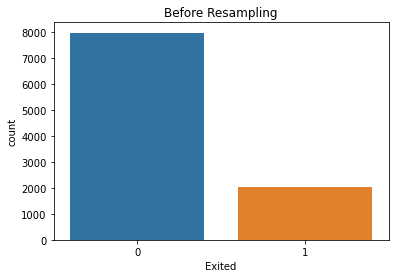

In [18]:
print(data['Exited'].value_counts())
sns.countplot('Exited', data = data)
plt.title('Before Resampling')
plt.show()

There is an imbalance of approximately 4 to 1 ratio. If a classification model is trained on an imbalanced dataset, it would be highly biased towards the dominant class. Thus, the model would reflect the underlying class distribution. In order to have an accurate model, we need to solve the imbalance issue.

There are different ways to use it as a solution. We can do oversampling (increase the number of observations in the minority class) or undersampling (decrease the number of observations in the majority class).

There are different oversampling techniques. One of the most common ones is the SMOTE (synthetic minority oversampling technique). SMOTE algorithm creates new samples according to the existing samples. It takes two or more similar observations and creates a synthetic observation by changing one attribute at a time. The amount of change is random but keeps the new observation within the neighboring distance of the existing observations used.

In [19]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# calling SMOTE library
sm = SMOTE(random_state=42)

# define x and y
x = data.drop('Exited', axis=1)
y = data['Exited']

x_reset, y_reset = sm.fit_sample(x, y)
print(pd.Series(y_reset).value_counts())

1    7963
0    7963
Name: Exited, dtype: int64


The number zeros and ones in the target variable are now equal.

## Feature Selection

We have explored the importance of features to some extent and gained insights into the relationship between them and the target variable.

Feature selection simply means using more valuable features. The value here is the information. We want to use the features that are more informative in terms of the target variable.

We will use Feature Impoertance, this gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

Feature importance is an inbuilt class that comes with Random Forest Classifier, we will be using Random Forest Classifier for extracting the top 8 features for the dataset.

[0.03264001 0.22140202 0.02580799 0.06194156 0.12659173 0.01636058
 0.14494283 0.03841932 0.07974673 0.02818184 0.06109689 0.0706192
 0.0922493 ]


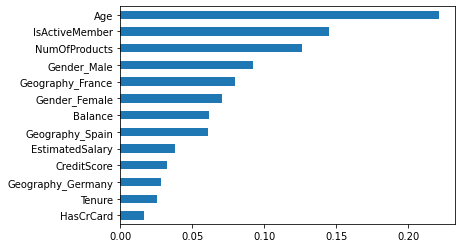

In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators = 200, max_depth= 10, random_state = 42)
model.fit(x_reset, y_reset)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_reset.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [20]:
# Dropping least columns
drop_columns = ['EstimatedSalary', 'Geography_Germany', 'CreditScore', 'Tenure', 'HasCrCard' ]
x_reset.drop(drop_columns, axis = 1, inplace = True)
x_reset.columns

Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France',
       'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

We used logistic regression as the estimator. The desired number of features is determined with the n_features_to_select parameter. RFE assigns a rank to each feature. The features that are assigned with 1 are the selected ones.

The eliminated features in our case are “EstimatedSalary”, "CreditScore", “Germany”, “Tenure”, and “HasCrCard”.

__Train test split__

We now need to split the dataset into a train and test subset. The model will be trained on the train set and tested on the test set.

It is important to split the dataset before doing applying feature engineering techniques. The model should never get any insight about the test set which is supposed to be consisting of new, previously unseen features.

In [21]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_reset, y_reset, test_size=0.2)

## Normalization

The value ranges of features are highly different. For instance, the maximum value of “Tenure” is 10 whereas the values in “EstimatedSalary” go up to 200 thousand.

If we feed features with different values ranges into a model, it is likely that the features with higher values are given more importance. We do not want that so we will bring features into similar ranges.
There are different techniques for normalization such as MinMaxScaler, StandardScaler, and RobustScaler.

In this project, we are going to use RobustScaler because it deals with outlier

In [22]:
# RobustScaler
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x_train)
x_train_transformed = transformer.transform(x_train)
x_test_transformed = transformer.transform(x_test)

## Models

We are using these models: RandomForestClassifier, XGBoost

## Model 1: RandomForestClassifier

              precision    recall  f1-score   support

   Non-Churn       0.87      0.88      0.87      1625
       Churn       0.88      0.86      0.87      1561

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



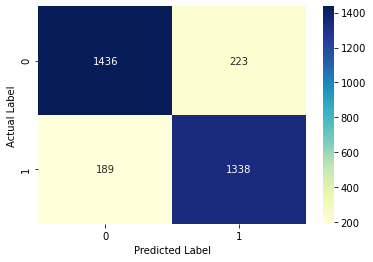

In [23]:
# instantiate Random Forest object with default params
RF  = RandomForestClassifier(n_estimators = 200, max_depth= 10, random_state = 42)

RF.fit(x_train, y_train)
pred = RF.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

              precision    recall  f1-score   support

   Non-Churn       0.89      0.91      0.90      6338
       Churn       0.91      0.88      0.90      6402

    accuracy                           0.90     12740
   macro avg       0.90      0.90      0.90     12740
weighted avg       0.90      0.90      0.90     12740



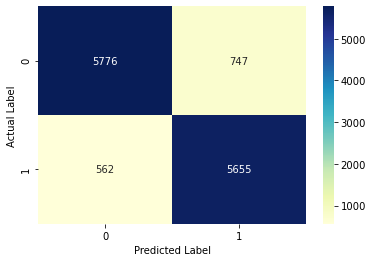

In [24]:
# instantiate Random Forest object with default params on TRAINING SET
RF  = RandomForestClassifier(n_estimators = 200, max_depth= 10, random_state = 42)

RF.fit(x_train, y_train)
pred_t = RF.predict(x_train)
CM = confusion_matrix(pred_t, y_train)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_train, pred_t, target_names=labels))

The accuracy on the train set is 90% and on the test set is 87%. The good thing is that our model is not overfitting. However, accuracy can be improved.

## Model 2: XGBOOT

              precision    recall  f1-score   support

   Non-Churn       0.83      0.89      0.86      6338
       Churn       0.89      0.83      0.85      6402

    accuracy                           0.86     12740
   macro avg       0.86      0.86      0.86     12740
weighted avg       0.86      0.86      0.86     12740



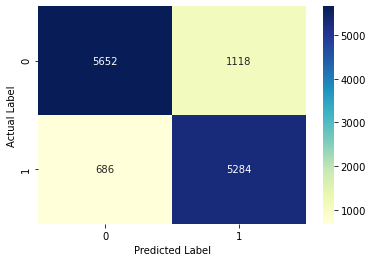

In [25]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators = 10, max_depth= 3, random_state = 42 )

xgbc.fit(x_train, y_train)
pred_t = xgbc.predict(x_train)
CM = confusion_matrix(pred_t, y_train)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_train, pred_t, target_names=labels))

              precision    recall  f1-score   support

   Non-Churn       0.84      0.89      0.86      1625
       Churn       0.88      0.83      0.85      1561

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



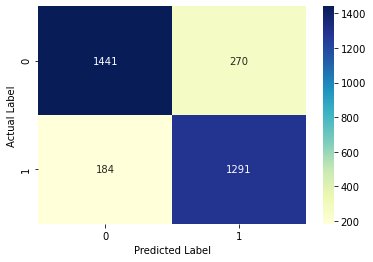

In [26]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators = 10, max_depth= 3, random_state = 42 )

xgbc.fit(x_train, y_train)
pred = xgbc.predict(x_test)
CM = confusion_matrix(pred, y_test)

sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-Churn', 'Churn']
print(classification_report(y_test, pred, target_names=labels))

Random Forest perform well out of the two models.

We also printed the confusion matrix which shows how many of the positive (1) and negative (0) classes are predicted correctly. Depending on the task, the prediction of a particular class is more important. In our case, correctly predicting the positive class (Exited=1) should be the focus because we want to know which customers will leave us.

On classification problems, accuracy does not provide a thorough evaluation of the model. Other metrics like precision, recall, and AUC might be more appropriate depending on the task.

__Let's improve the performance of our Random Forest Model__

It is important to note that the go-to way to increase the performance of a model is usually collecting more data. However, it may not always be an available option.


The confusion matrix goes deeper than classification accuracy by showing the correct and incorrect (i.e. true or false) predictions on each class.
Let’s first focus on the accuracy and then dive deep into the confusion matrix and related metrics.

One way to improve the performance of a model is to search for optimal hyperparameters. Adjusting the hyperparameters is like tuning the model. There are many hyperparameters of the random forest but the most important ones are the number of trees (n_estimators) and the maximum depth of an individual tree (max_depth).

We will use the GridSearchCV class of scikit-learn. It allows selecting the best parameters from a range of values. Let’s first create a dictionary that includes a set of values for n_estimators and max_depth. I will select the values around the ones we used previously.

In [27]:
parameters = {'max_depth':[8,10,12,14], 
              'n_estimators':[175,200,225,250]}

We can now pass this dictionary to a GridSearchCV object along with an estimator.

In [28]:
RF = RandomForestClassifier()
gridsearch = GridSearchCV(RF, param_grid=parameters, cv=5)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12, 14],
                         'n_estimators': [175, 200, 225, 250]})

The cv parameter is doing the cross-validation.
We have trained the GridSearchCV object. Let’s see what the best parameters are:

In [29]:
gridsearch.best_params_

{'max_depth': 10, 'n_estimators': 250}

Let’s see the confusion matrix and accuracy with these new hyperparameter values.

In [30]:
RF = RandomForestClassifier(max_depth=10, n_estimators=250, random_state = 42)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred)
print(cm_train)

y_test_pred = RF.predict(x_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

train_acc = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()
test_acc = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print(f'Train accuracy is {train_acc}. Test accuracy is {test_acc}')

[[5780  558]
 [ 749 5653]]
[[1436  189]
 [ 224 1337]]
Train accuracy is 0.8974097331240188. Test accuracy is 0.8703703703703703


The accuracy on the training set decreased but we did not achieve anything on the test set. If we can collect more data which is usually the best way to increase the accuracy, test accuracy might also improve with these new parameters.

If you recall from, we had eliminated the 5 features which are less informative compared to other ones. In some cases, it is a good practice to eliminate less informative or uncorrelated features not to put unnecessary computation burden on the model. However, these eliminated features might slightly improve the accuracy so it comes down to a decision between performance enhancement and computation burden.

I played around with the hyperparameter values and trained with all the features. Here is the result:

In [39]:
RF = RandomForestClassifier(max_depth=10, n_estimators=250)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred)
print(cm_train)

y_test_pred = RF.predict(x_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

train_acc = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()
test_acc = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print(f'Train accuracy is {train_acc}. Test accuracy is {test_acc}')

[[6030  367]
 [ 661 5682]]
[[1417  149]
 [ 227 1393]]
Train accuracy is 0.9193092621664051. Test accuracy is 0.8819836785938481


We have achieved an approximately %1 increase in both train and test accuracy which is also an improvement in terms of overfitting.

__OUR TASK__

Our task is to predict if a customer will churn (i.e. stop being a customer). Thus, the focus should be on the positive class (1). We have to predict all the positive classes (Exited=1) correctly. We can afford to have some wrong predictions on the negative class (Exited=0).

Since we want to predict customer churn as much as possible, we aim to maximize TP and minimize FN.

FN occurs when we predict “the customer will not churn (0)” but, in the actual situation, customer churns.

It is time to introduce two metrics which are __precision__ and __recall__.

__Precision__ measures how good our model is when the prediction is positive.

__Recall__ measures how good our model is at correctly predicting positive classes.

We want to predict all the positive classes so recall is the appropriate metric for our task. Maximizing TP and/or minimizing FN will increase the recall value.

We need to minimize the values of our false negatives (FN) in the confusion metrix above.

One way to achieve this is to tell the model that “positive class (1) is more important than the negative class (0)”. With our random forest classifier, it can be achieved by the __class_weight__ parameter.

We passed a dictionary that contains weights for each class. I set it as 3 to 1 as an example.

Here are the new confusion matrices:

In [31]:
RF = RandomForestClassifier(max_depth=10, n_estimators=250,
                            class_weight={0:1, 1:3})
RF.fit(x_train, y_train)

y_pred = RF.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred)
print(cm_train)

y_test_pred = RF.predict(x_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

train_acc = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()
test_acc = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

[[5124 1214]
 [ 310 6092]]
[[1245  380]
 [ 138 1423]]


The number of false positives is greatly reduced. The wrong predictions on the positive class are more penalized than the ones on negative class. Thus, the model leans towards making mistakes on the positive class as low as possible.

There is a downside to this approach. While getting better at predicting the positive class, the overall accuracy might get worse. Let’s check.

In [26]:
print(f'Train accuracy is {train_acc}. Test accuracy is {test_acc}')

Train accuracy is 0.8773940345368917. Test accuracy is 0.8518518518518519


We can see how our accuracy went down. Thus, it comes down to a business decision. If we just want to predict all positive classes and do not care about the overall accuracy, we can further increase the weight of the positive class.

## Thank you for reading.